In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic-kevin.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

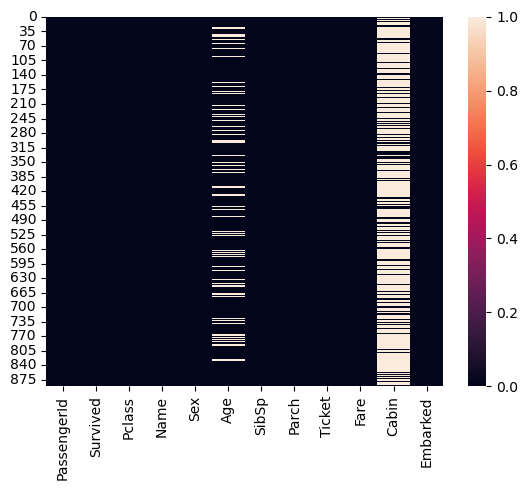

In [6]:
sb.heatmap(df.isnull())

In [7]:
a=df['Age'].mean()
a

29.69911764705882

In [8]:
df['Age'].fillna(a,inplace=True)

<Axes: >

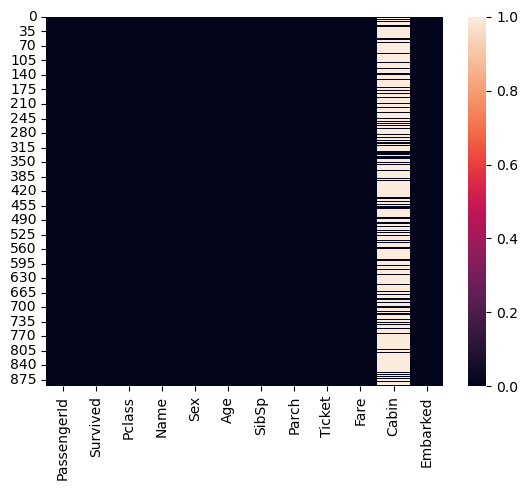

In [9]:
sb.heatmap(df.isnull())

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Embarked'].replace(np.nan,'S',inplace=True)

In [12]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [13]:
# df.drop(['Cabin'],axis=1,inplace=True)

df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
df['Cabin'].replace(np.nan,'B96',inplace=True)

<Axes: >

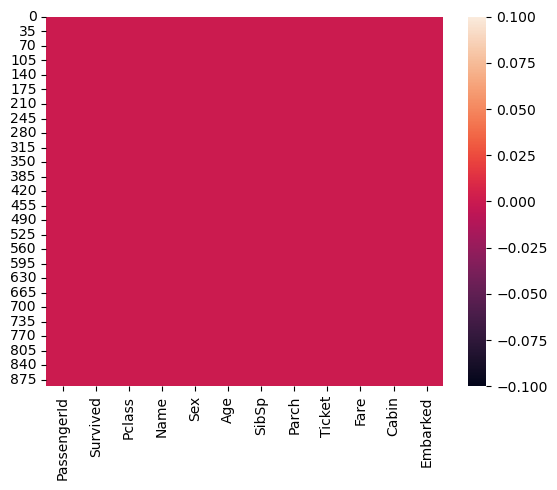

In [15]:
sb.heatmap(df.isnull())

In [16]:
df_obj=df.select_dtypes(object)
df_obj

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,B96,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [17]:
df_num=df.select_dtypes(['int64','float64'])
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i  in df_obj:
    df_obj[i]=le.fit_transform(df_obj[i])

In [19]:
df_obj

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,82,0
2,353,0,669,47,2
3,272,0,49,56,2
4,15,1,472,47,2
...,...,...,...,...,...
886,548,1,101,47,2
887,303,0,14,30,2
888,413,0,675,47,2
889,81,1,8,61,0


In [20]:
df_sum=pd.concat([df_obj,df_num],axis=1)

In [21]:
df_sum

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,108,1,523,47,2,1,0,3,22.000000,1,0,7.2500
1,190,0,596,82,0,2,1,1,38.000000,1,0,71.2833
2,353,0,669,47,2,3,1,3,26.000000,0,0,7.9250
3,272,0,49,56,2,4,1,1,35.000000,1,0,53.1000
4,15,1,472,47,2,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
886,548,1,101,47,2,887,0,2,27.000000,0,0,13.0000
887,303,0,14,30,2,888,1,1,19.000000,0,0,30.0000
888,413,0,675,47,2,889,0,3,29.699118,1,2,23.4500
889,81,1,8,61,0,890,1,1,26.000000,0,0,30.0000


In [22]:
X=df_sum.drop('Survived',axis=1)
Y=df_sum['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [25]:
X_train.shape

(623, 11)

In [26]:
X_test.shape

(268, 11)

In [27]:
Y_train.shape

(623,)

In [28]:
Y_test.shape

(268,)

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [30]:
X_train

array([[-1.55045679, -1.36783323, -0.86336997, ..., -0.47149154,
        -0.4764597 , -0.35793161],
       [-1.71183011, -1.36783323,  1.1772294 , ...,  0.4915879 ,
        -0.4764597 , -0.1527973 ],
       [ 1.26204962,  0.73108328,  0.05208689, ..., -0.47149154,
        -0.4764597 , -0.49901694],
       ...,
       [-0.28252357,  0.73108328,  1.41248647, ..., -0.47149154,
        -0.4764597 ,  0.91138918],
       [-0.463108  , -1.36783323,  1.69888638, ..., -0.47149154,
        -0.4764597 , -0.50645119],
       [-1.21234126,  0.73108328,  0.86525807, ..., -0.47149154,
        -0.4764597 , -0.49570184]])

In [31]:
X_test

array([[ 1.33505184, -1.36783323, -1.31342697, ..., -0.47149154,
        -0.4764597 , -0.11132198],
       [ 0.50513191,  0.73108328,  0.15437257, ..., -0.47149154,
        -0.4764597 , -0.49901694],
       [-0.24410135, -1.36783323,  1.49431502, ..., -0.47149154,
        -0.4764597 , -0.44302998],
       ...,
       [-0.25562802,  0.73108328,  1.48920073, ..., -0.47149154,
        -0.4764597 , -0.40486976],
       [-1.38524125,  0.73108328, -1.43616979, ...,  0.4915879 ,
        -0.4764597 ,  1.28931942],
       [-1.15086571,  0.73108328,  1.70400067, ...,  0.4915879 ,
        -0.4764597 ,  0.6464175 ]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [34]:
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(Y_test,y_pred))

[[126  27]
 [ 31  84]]


In [37]:
TP,FP,FN,TN=confusion_matrix(Y_test,y_pred).flatten()

In [38]:
print("TP",TP)
print("FP",FP)
print('FN',FN)
print("TN",TN)

TP 126
FP 27
FN 31
TN 84


In [39]:
from sklearn.metrics import classification_report

In [40]:
print('classification report')
print(classification_report(Y_test,y_pred))

classification report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       153
           1       0.76      0.73      0.74       115

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [41]:
print(lr.score(X_test,Y_test))

0.7835820895522388


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [44]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
classifier.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [46]:
X_test

array([[ 1.33505184, -1.36783323, -1.31342697, ..., -0.47149154,
        -0.4764597 , -0.11132198],
       [ 0.50513191,  0.73108328,  0.15437257, ..., -0.47149154,
        -0.4764597 , -0.49901694],
       [-0.24410135, -1.36783323,  1.49431502, ..., -0.47149154,
        -0.4764597 , -0.44302998],
       ...,
       [-0.25562802,  0.73108328,  1.48920073, ..., -0.47149154,
        -0.4764597 , -0.40486976],
       [-1.38524125,  0.73108328, -1.43616979, ...,  0.4915879 ,
        -0.4764597 ,  1.28931942],
       [-1.15086571,  0.73108328,  1.70400067, ...,  0.4915879 ,
        -0.4764597 ,  0.6464175 ]])

In [47]:
classifier.score(X_test,Y_test)

0.7611940298507462

AttributeError: 'list' object has no attribute 'write'

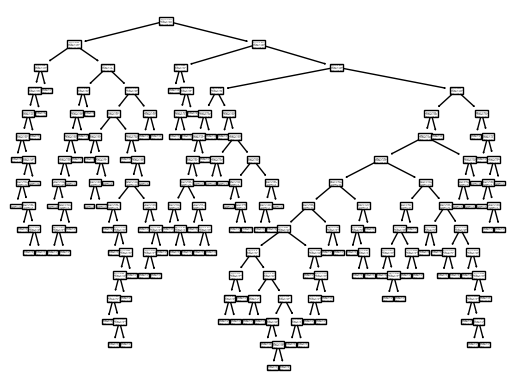

In [53]:
from sklearn import tree
a=tree.plot_tree(classifier)
print(a)
# plt.savefig('graph1.pdf')

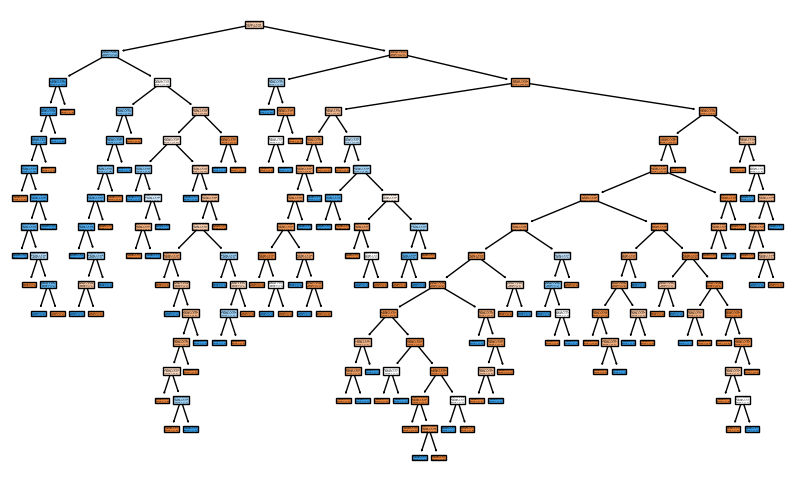

In [55]:
plt.figure(figsize=(10, 6))
tree.plot_tree(classifier, filled=True)
plt.savefig('graph1.png', format='png')  # Save the tree plot as an image file
plt.show()

In [49]:
# for i in range(1,101):
#     dtc=DecisionTreeClassifier(random_state=i)
#     dtc.fit(X_train,Y_train)
#     y_pred=dtc.predict(X_test)
#     print("random_state",i)
#     print(classification_report(Y_test,y_pred))
#     print(confusion_matrix(Y_test,y_pred))

In [50]:
# The classification report you provided appears to be based on a classification model trained on the Titanic dataset, which is a common dataset for predicting whether passengers survived or not. Here's an analysis of the classification report:

# Precision: Precision is the ability of the classifier not to label as "survived" someone who did not survive (class 0) or not to label as "not survived" someone who did survive (class 1).

# For class 0 (did not survive), precision is 0.57. This means that out of all the passengers predicted not to survive, 57% were actually passengers who did not survive.
# For class 1 (survived), precision is 0.42. This indicates that out of all the passengers predicted to survive, only 42% actually survived.
# Recall (Sensitivity): Recall measures the ability of the classifier to identify passengers who actually survived (class 1) or identify those who did not survive (class 0).

# For class 0, recall is 0.69. This implies that the classifier correctly identified 69% of the passengers who did not survive.
# For class 1, recall is 0.30. This suggests that the classifier only correctly identified 30% of the passengers who survived.
# F1-Score: The F1-Score is the harmonic mean of precision and recall, providing a balance between the two. It's particularly useful when there is an imbalance between the classes. In this case, the F1-Scores are 0.62 for class 0 and 0.35 for class 1.

# Support: Support is the number of instances in each class. In this report, there are 153 instances in class 0 (did not survive) and 115 instances in class 1 (survived).

# Accuracy: The overall accuracy of the model is 0.52. It means that the classifier correctly predicted 52% of the passengers' survival status.

# Macro Avg: The macro average is the unweighted average of precision, recall, and F1-Score across both classes. In this case, it's approximately 0.49.

# Weighted Avg: The weighted average is computed by taking into account the number of instances in each class. The weighted average is around 0.50.

# In summary, the classification report provides an evaluation of the model's performance for predicting passenger survival on the Titanic. The precision and recall values suggest that the model is better at predicting passengers who did not survive (class 0) than those who survived (class 1). The accuracy is 52%, which is an overall measure of the model's correctness. Depending on the specific goals and requirements of your analysis, you may want to fine-tune the model or consider other classification algorithms to improve the results.





